In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import utils 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN, CuDNNLSTM, CuDNNGRU, Bidirectional
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer, text_to_word_sequence #инструменты предобработки текста от кераса
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split #модуль для разбиения данных на обучающую и тестовую выборки

Using TensorFlow backend.


In [2]:
import requests
from bs4 import BeautifulSoup
import time
import os

headers = {
   "Accept": "text/html",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36",
    "cookie": "PHPSESSID=nva1aso54t3ur1jcrv440m2521; yandex_gid=11030; _csrf_csrf_token=fUqWvJv7DWdy4uo-s-0XB3wmRLhKOJRS48iPG68RaG4; desktop_session_key=cdfb3c0120404a16d5b6745e8503e714c3d7df0d2bae6a24639f7331ce64768ba7fc3053a9b5b305a3b19901bc22727669f804f30fd6fb4bdb60cbd1b67b799fcb1709a720864edf49422a117925a492f5fee8fb5a9ab1ae3111fe9e3da1c53f; desktop_session_key.sig=931Ytxc7Z-hGPcLSClDUjLintHE; mda_exp_enabled=1; yandexuid=1631874731573983881; _ym_uid=15743269971036485775; mda=0; _ym_uid=15743269971036485775; yuidss=1631874731573983881; user-geo-region-id=11030; user-geo-country-id=2; _ym_d=1575283329; my_perpages=%5B%5D; gdpr=0; yp=1583874685.oyu.1631874731573983881#1586167652.yu.1631874731573983881; ymex=1588673252.oyu.1631874731573983881; mykp_button=edit_main; yandex_login=infovokzal; uid=22026293; crookie=oSSdn3IkyV0SHbNG/D6JfpNDHGB/czc88gnSCvF7XuUlS7U5EU0VVVyhEFYY7EteJvlDLezvKOQcW6qNlQhkvj1yDCc=; cmtchd=MTU4OTg5NDYwMjA2NQ==; location=1; mobile=no; i=A5QRuX+3GSwV+q3mGl6vuTE3e+doAoom0z817868mv+bolhle7g9DVw1uKqY+yU1wv+akjHA+SW7PYZJW6h0RCik2AU=; tc=5836; yandex_ugc_rating_status=no; yandex_ugc_rating_status.sig=pw4cVz6AAY2ipArQXugmwejk7uw; ya_sess_id=3:1590303329.5.0.1574018312846:u3erTw:7a.1|46580927.0.2|740902983.760370.2.2:760370|30:189777.879061.cp8_3js0Jfr2sF8ZR5rYEV8pue8; ys=udn.cDppbmZvdm9remFs#c_chck.3359023974; mda2_beacon=1590303329095; user_country=ru; yandex_plus_metrika_cookie=true; sso_status=sso.passport.yandex.ru:failed; spravka=dD0xNTkwMzI2NjE4O2k9MTg1LjE5NC4xMDQuMTMyO3U9MTU5MDMyNjYxODIzMTU0NTA4NDtoPTViNWZjNjJkMTZjYzcwMGQwNjc4YzQyODhiMGQzNGFh; _ym_d=1590326661"}

def load_data(url):
    r = requests.get(url, headers = headers) # отправка http запроса
    soup = BeautifulSoup(r.text, 'html.parser')# создание html парсера
    reviews = soup.find_all(class_='_reachbanner_')# сохранение только отзывов
    print('reviews: ', len(reviews))
    reviews_clean = []
    for review in reviews:# очистка от лишней html разметки
        reviews_clean.append(review.find_all(text=True))
    return reviews_clean

def convert(reviews): # преобразование отзывов в строки
    review_converted = []
    for review in reviews:
        for i in review:
            map(str, i)
        review = ''.join(review)
        review_converted.append(review)
    return review_converted

def parsing(status, path):
    page = 1
    delays = [3, 2, 1, 4.5, 5.5, 3.5, 2.2, 1.3, 2.8]
    time.sleep(np.random.choice(delays)) # Выбор рандомной задержки
    while True:
        if os.path.isfile(path + r'/{}/{}_{}.txt'.format(status, page, 0)):
            print('такая страница уже спарсена: ', status, page)
            #page += 1
            break
        else:
            print('page: ', page)
            loaded_data = load_data('https://www.kinopoisk.ru/reviews/type/comment/status/{}/period/month/page/{}/perpage/200/#list'.format(status, page))
            if loaded_data == []:
                if page == 1: 
                    sys.exit()
                break
            else:
                print('status: ', status)
                # Eсли папок с классами не существует, программа их создаст
                if not os.path.exists(path + r'/{}'.format(status)):
                    os.makedirs(path + r'/{}'.format(status))
                converted_data = convert(loaded_data)
                # Сохранение отзывов
                for i, review in enumerate(converted_data):
                    pathItem = path + r'/{}/{}_{}.txt'.format(status, page, i)
                    with open(pathItem, 'w', encoding = 'utf-8') as output:
                        output.write(review)
                print('converted_data: ', len(converted_data))
                if len(converted_data) == 200:
                    page += 1
                    time.sleep(np.random.choice(delays))
                else:
                    break

            
path = 'C:/Users/azovm/PycharmProjects/work/kinopoisk'

className = ['good', 'bad', 'neutral']
delays = [2, 1, 4, 6, 3.5, 2.5, 1, 5.3, 7]
for status in className:
    parsing(status = status, path=path)
    print('one category done', status)
    time.sleep(np.random.choice(delays))


такая страница уже спарсена:  good 1
one category done good
такая страница уже спарсена:  bad 1
one category done bad
такая страница уже спарсена:  neutral 1
one category done neutral


In [3]:
def readText(fileName):
  f = open(fileName, mode="r", encoding="utf-8")
  text = f.read()
  text = text.replace("\n"," ")
  return text


texts = []
classes = []
#path = "C:/Users/azovm/PycharmProjects/work/books/"
path = "C:/Users/azovm/PycharmProjects/work/kinopoisk/"
for i in range(len(className)):  
    for root, dirs, files in os.walk(path+className[i]):  
        for filename in files:
            #print(filename)
            texts.append(readText(path+className[i]+"/"+filename))
            classes.append(className[i])



In [4]:
from sklearn.preprocessing import LabelEncoder

maxWordsCount = 50000

tokenizer = Tokenizer(num_words=maxWordsCount, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–', lower=True, split=' ', char_level=False, oov_token = 'unknown')
tokenizer.fit_on_texts(texts) 
items = list(tokenizer.word_index.items()) 


#xAll = tokenizer.texts_to_matrix(texts) #каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount отметилось в нем единичкой 
#print(xAll.shape)  #взглянем на форму текстов
#print(xAll[0, :20])#и отдельно на фрагмент начала вектора

encoder = LabelEncoder() #вызываем метод кодирования тестовых лейблов из библиотеки sklearn
encoder.fit(classes)     #подгружаем в него категории из нашей базы
classesEncoded = encoder.transform(classes)           #кодируем категории
yAll = utils.to_categorical(classesEncoded, len(className)) #и выводим каждый лейбл в виде вектора длиной 22, с 1кой в позиции соответсвующего класса и нулями
print(yAll.shape)  #взглянем на форму лейблов категорий
print(yAll[0])

(3594, 3)
[0. 1. 0.]


In [5]:
for i in range(len(className)):
  print(i, sum(classesEncoded == i))
  



0 621
1 2309
2 664


In [6]:
Sequences = tokenizer.texts_to_sequences(texts) 


print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", texts[1] [:87])
print("Он же в виде последовательности индексов: ", Sequences[1][:20])

print()
print()

print("Статистика по обучающим текстам:")
for i in range(len(className)):
  print(className[i], " ", len(texts[i]), " символов, ", len(Sequences[i]), " слов")
print("В сумме ", len(texts[0])+len(texts[1])+len(texts[2])+len(texts[3])+len(texts[4])+len(texts[5]), " символов, ", len(Sequences[0])+len(Sequences[1])+len(Sequences[2])+len(Sequences[3])+len(Sequences[4])+len(Sequences[5]), " слов")


Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Творчество норвежского режиссёра Ханса Петтера Муланда на родине давно и тесно связано 
Он же в виде последовательности индексов:  [3897, 21397, 625, 13238, 31256, 31257, 5, 5249, 324, 2, 5486, 2784, 7, 376, 13, 330, 41120, 5, 1502, 116122]


Статистика по обучающим текстам:
good   1472  символов,  211  слов
bad   4877  символов,  687  слов
neutral   3435  символов,  503  слов
В сумме  15684  символов,  2261  слов


In [45]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
  return xSample
# Формируем новую базу
splitTexts = []
splitClases = []
xLen = 25 #Длина отрезка текста, по которой анализируем, в словах
step = 5 #Шаг разбиения исходного текста на обучающие вектора

for num in range(len(Sequences)):
  class_list = []
  part = getSetFromIndexes(Sequences[num], xLen, step)
  #print(len(spl_mes))
  # добавляем к общему списку раскусанные сообщения
  splitTexts.extend(part)

  for i in range(len(part)): 
    class_list.append(yAll[num])
  splitClases.extend(class_list)

print(len(splitTexts))
print(len(splitClases))


259881
259881


In [46]:
splitTexts = np.array(splitTexts)
splitClases = np.array(splitClases)
#разбиваем текст на последовательность индексов
#xAll = tokenizer.texts_to_matrix(new_texts)             #переведём в массив numpy
xTrain, xVal, yTrain, yVal = train_test_split(splitTexts, splitClases, test_size=0.2)#сформируем новую форму выборки
print(xTrain.shape) #взглянем на форму текстов из обучающей выборки
print(yTrain.shape)  #и на форму соответствующих им классов

(207904, 25)
(207904, 3)


C:\Users\azovm\.conda\envs\tensorflow_gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 207904 samples, validate on 51977 samples
Epoch 1/20
207904/207904 [==============================] - 26s 127us/step - loss: 0.5525 - accuracy: 0.7690 - val_loss: 0.1521 - val_accuracy: 0.9485
Epoch 2/20
207904/207904 [==============================] - 25s 120us/step - loss: 0.0771 - accuracy: 0.9737 - val_loss: 0.0691 - val_accuracy: 0.9764
Epoch 3/20
207904/207904 [==============================] - 24s 113us/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0700 - val_accuracy: 0.9770
Epoch 4/20
207904/207904 [==============================] - 23s 109us/step - loss: 0.0236 - accuracy: 0.9917 - val_loss: 0.0613 - val_accuracy: 0.9803
Epoch 5/20
207904/207904 [==============================] - 23s 109us/step - loss: 0.0237 - accuracy: 0.9916 - val_loss: 0.0621 - val_accuracy: 0.9800
Epoch 6/20
207904/207904 [==============================] - 23s 109us/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 0.0582 - val_accuracy: 0.9825
Epoch 7/20
207904/207904 [=================

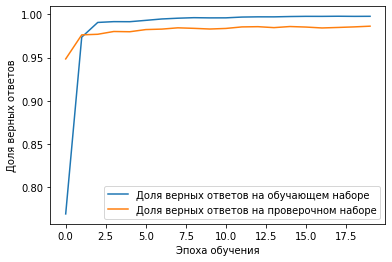

In [49]:

model = Sequential()
model.add(Embedding(maxWordsCount, 500, input_length=xLen))
model.add(SpatialDropout1D(0.2)) #добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
model.add(BatchNormalization()) #добавляем слой нормализации данных
model.add(Conv1D(20, 5, activation="relu")) #добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
#model.add(MaxPooling1D(2)) #добавляем слой подвыборки/пулинга с функцией максимума
#model.add(Conv1D(20, 5, activation="relu")) #добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
#model.add(MaxPooling1D(2)) #добавляем слой подвыборки/пулинга с функцией максимума
model.add(Dropout(0.2)) #добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
model.add(BatchNormalization()) #добавляем слой нормализации данных
model.add(Flatten()) #добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)бавляем слой нормализации данных
model.add(Dense(len(className), activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = model.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=256,
                    validation_data=(xVal, yVal))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()




In [50]:

def allClassesPercent(model, xTest, yTest):
  
  predict = model.predict(xTest)

  y_pred = np.zeros(len(className))
  y_test = np.zeros(len(className))

  for i in range(len(yTest)):
    y_test[np.argmax(yTest[i])] += 1
    if np.argmax(predict[i]) == np.argmax(yTest[i]):
      y_pred[np.argmax(predict[i])] += 1 

  y_summary = y_pred / y_test
  #Проходим по всем классам
  for i in range(len(className)): 
    print(className[i], ', результат: ', round(y_summary[i] * 100,1), '%')
  return 


allClassesPercent(model, xVal, yVal)






good , результат:  97.8 %
bad , результат:  99.3 %
neutral , результат:  97.1 %
